# Исследование закономерностей, определяющих успешность игр.

**Цель исследования** - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных в датасете:**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 

# Изучение данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
# Загрузка файла с данными
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# Вывод первых 5 строк таблицы 
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Вывод основной информации по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


В данных присутствует большое количество пропусков, которые требуют предобработки. 
Также есть неточность в типах столбцов. Столбец `user_score` имеет тип object, но в нем содержатся численные значения.

# Предобработка данных

#### Замена названий столбцов
Приведем все названия столбцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Обработка пропусков

In [7]:
# Вывод количества пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# Выведем долю пропусков от общего числа значений в каждом столбце
data.isna().mean()*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Доля пропусков в столбцах `year_of_release`, `genre` и `name` менее 1%, соответственно это не окажет существенного влияния на результаты исследования, и данные строки можно исключить

In [9]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Изменим тип данных в столбце `year_of_release` на `int`, т.к. год - целое число

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 2.0+ MB


Т.к. некоторые игры выпущены на разных платформах, то логично предположить, что рейтинг ESRB у них одинаковый. Заменим пропуски в таких значениях на известные значения рейтинга на других платформах. 

In [14]:
# создадим таблицу без пропусков
data_no_na = data.dropna()

# цикл для замены пропусков, если для данных игр указан рейтинг на других платформах
for name in data_no_na['name'].unique(): 
    if name in data_no_na['name'].unique():
        data.loc[(data['name'] == name) & (data['rating'].isna()), 'rating'] = \
        data_no_na.loc[(data['name'] == name), 'rating'].max()
    
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Была произведена замена 351 пропуска. Для остальных игр нет значений рейтинга. Заменим пропуски в рейтинге на значение "unknown".

In [15]:
data['rating'] = data['rating'].fillna('unknown')

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Так как в данном случае нет данных по оценкам критиков части игр и нет источника, откуда можно было бы взять данные, установим для пропусков заглушку -1

In [16]:
data['critic_score'] = data['critic_score'].fillna(-1)

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,unknown


In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating                0
dtype: int64

Изучим данные в столбце `user_score`

In [18]:
# выведем список уникальных значений столбца
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце присутствует, кроме численных значений, значение "tbd", что означает, что рейтинг еще не определен. Соответственно у игр с данным обозначением отсутствует рейтинг. Заменим значением "tbd" на "nan".

In [19]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Столбец `user_scores` имеет тип `object`. Приведем столбец к типу `float`, т.к. в нем содержатся цифры

In [21]:
data['user_score'] = data['user_score'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


Так как в столбце `user_score` днет данных по оценкам пользователей части игр и нет источника, откуда можно было бы взять данные, установим для пропусков заглушку -1

In [22]:
data['user_score'] = data['user_score'].fillna(-1)

data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [23]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown


#### Подсчет суммарных продаж во всех регионах. Запишем их в столбец `total_sales`

In [24]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


#### Промежуточные выводы

## На этапе предобработки данных было сделано следующее:
1. Названия столбцов приведены к нижнему регистру
2. Выявлены и обработаны пропуски в столбцах 
- пропуски в столбцах `year_of_release`, `name` и `genre` составляют менее 2% и были удалены, т.к. нет значений, по которым можно было бы заполнить их и это не повлияет на результаты дальнейшего исследования. 
- пропуски в столбце `rating` были частично заменены для игр, которые присутствуют на нескольких платформах по значениям, присвоенным на других платформах, остальным были заменены на значение `unknown`
- выявлены значения типа `object` в столбце `user_score` и обработаны путем замены на значение `Nan`, т.к. были обозначены аббревиатурой `tbd`, что равнозначно тому, что рейтинг отсутствует
- пропуски в столбцах `user_score` и `critic_score` были замены на заглушки -1, т.к. нет данных, на основании которых можно было бы их заполнить.
3. Добавлен столбец `total_score`, в котором содержатся суммарные продажи по всем регионам
4. Были изменен формат данных в столбце `year_of_release` на `int`, в столбце `user_score` на `float`
5. В рамках предобработки данных было удалено менее 1% данных


# Исследовательский анализ данных

#### Проанализируем, сколько игр выпускалось в разные годы

In [25]:
data_games_years = (
    data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
    .reset_index()
)

data_games_years.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


Построим гистограмму по полученным данным

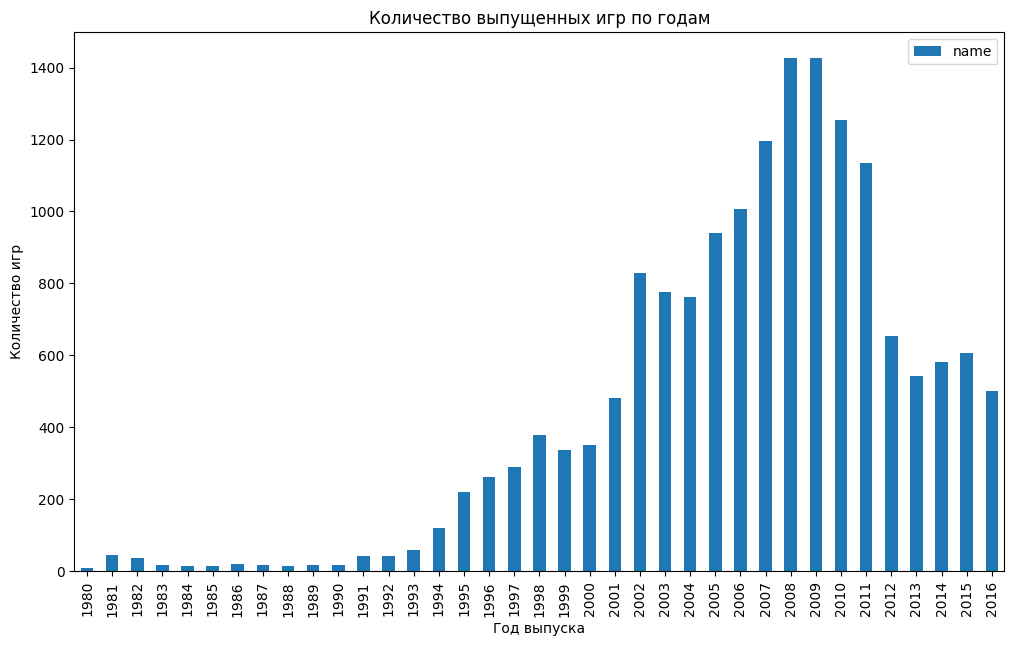

In [66]:
data_games_years.plot(kind='bar', x='year_of_release', y='name', figsize=(12,7))
plt.title('Количество выпущенных игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.show;

С 1994 года начался стремительный рост выпуска игр и он продлился до 2008 года, с 2010 года начался ежегодный спад.

#### Проанализируем  как менялись данные по продажам по платформам

До 1995 года было достаточно небольшое количество продаж, поэтому для последующего анализа динамики продаж по платформам сделаем выборку с 1995 по 2016 год

In [27]:
platform_sales = (
    data.query('year_of_release > 1994')
    .pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc='sum')
    .reset_index())
    
platform_sales

platform,year_of_release,3DO,3DS,DC,DS,GB,GBA,GC,N64,NG,...,PSV,SAT,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1995,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,0.33,...,NaN,11.57,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,NaN,NaN,NaN,NaN,36.03,NaN,NaN,34.10,0.10,...,NaN,7.69,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997,NaN,NaN,NaN,NaN,6.37,NaN,NaN,39.50,NaN,...,NaN,6.77,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998,NaN,NaN,3.38,NaN,26.90,NaN,NaN,49.24,NaN,...,NaN,3.82,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999,NaN,NaN,5.16,NaN,38.00,NaN,NaN,57.87,NaN,...,NaN,0.09,0.26,NaN,0.46,NaN,NaN,NaN,NaN,NaN
5,2000,NaN,NaN,5.99,NaN,19.76,0.07,NaN,33.97,NaN,...,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
6,2001,NaN,NaN,1.07,NaN,9.24,61.53,26.34,3.25,NaN,...,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,22.26,NaN
7,2002,NaN,NaN,0.29,NaN,NaN,74.16,51.81,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN
8,2003,NaN,NaN,NaN,NaN,NaN,56.67,50.61,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.04,NaN
9,2004,NaN,NaN,NaN,17.27,NaN,77.91,28.82,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.42,NaN


Построим гистограмму суммарных продаж по платформам за выбранный период

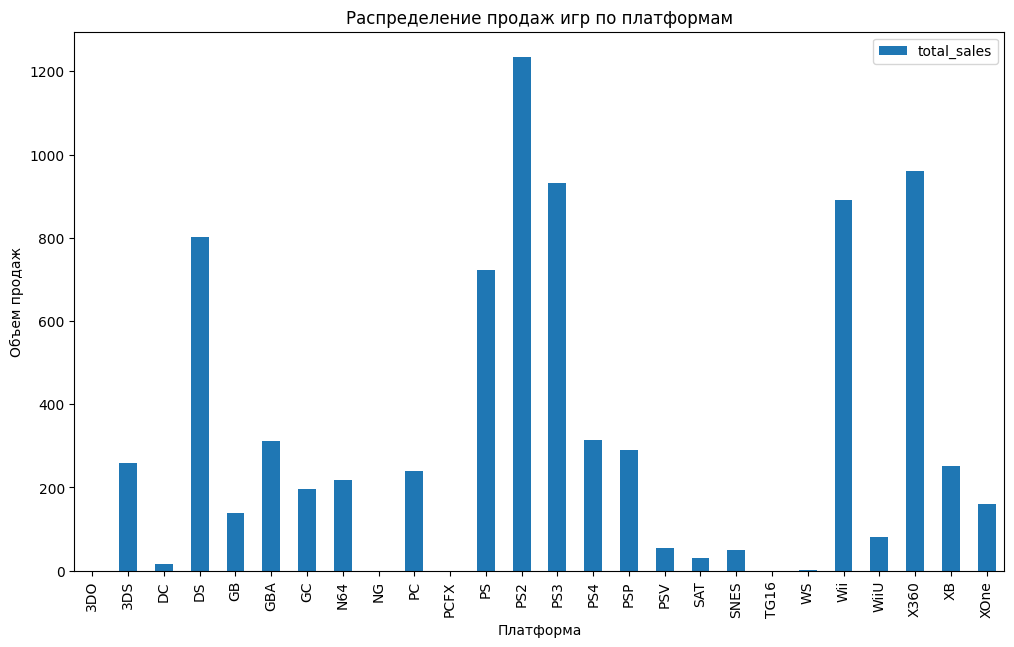

In [69]:
(data.query('year_of_release > 1994')
    .pivot_table(index='platform', values = 'total_sales', aggfunc='sum')
    .reset_index()
    .plot(kind='bar', x='platform', y='total_sales', figsize=(12,7))
)
plt.title('Распределение продаж игр по платформам')
plt.ylabel('Объем продаж')
plt.xlabel('Платформа')
plt.show;

Построим диаграмму распределения по годам по платформам

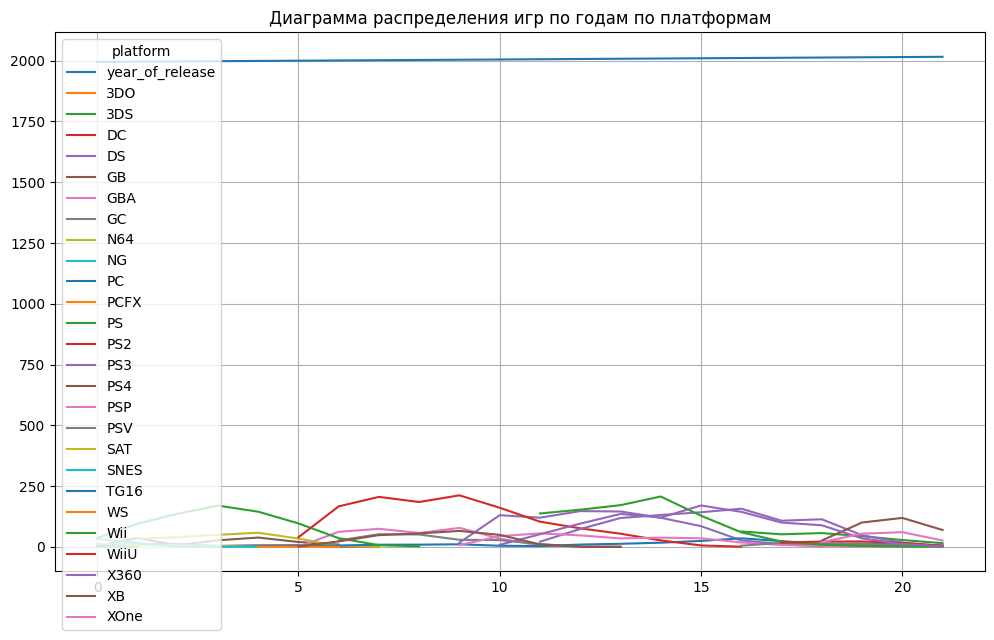

In [72]:
platform_sales.plot(figsize = (12,7), grid = True)
plt.title('Диаграмма распределения игр по годам по платформам')
plt.show;

Построим гистограммы продаж для каждой платформы отдельно

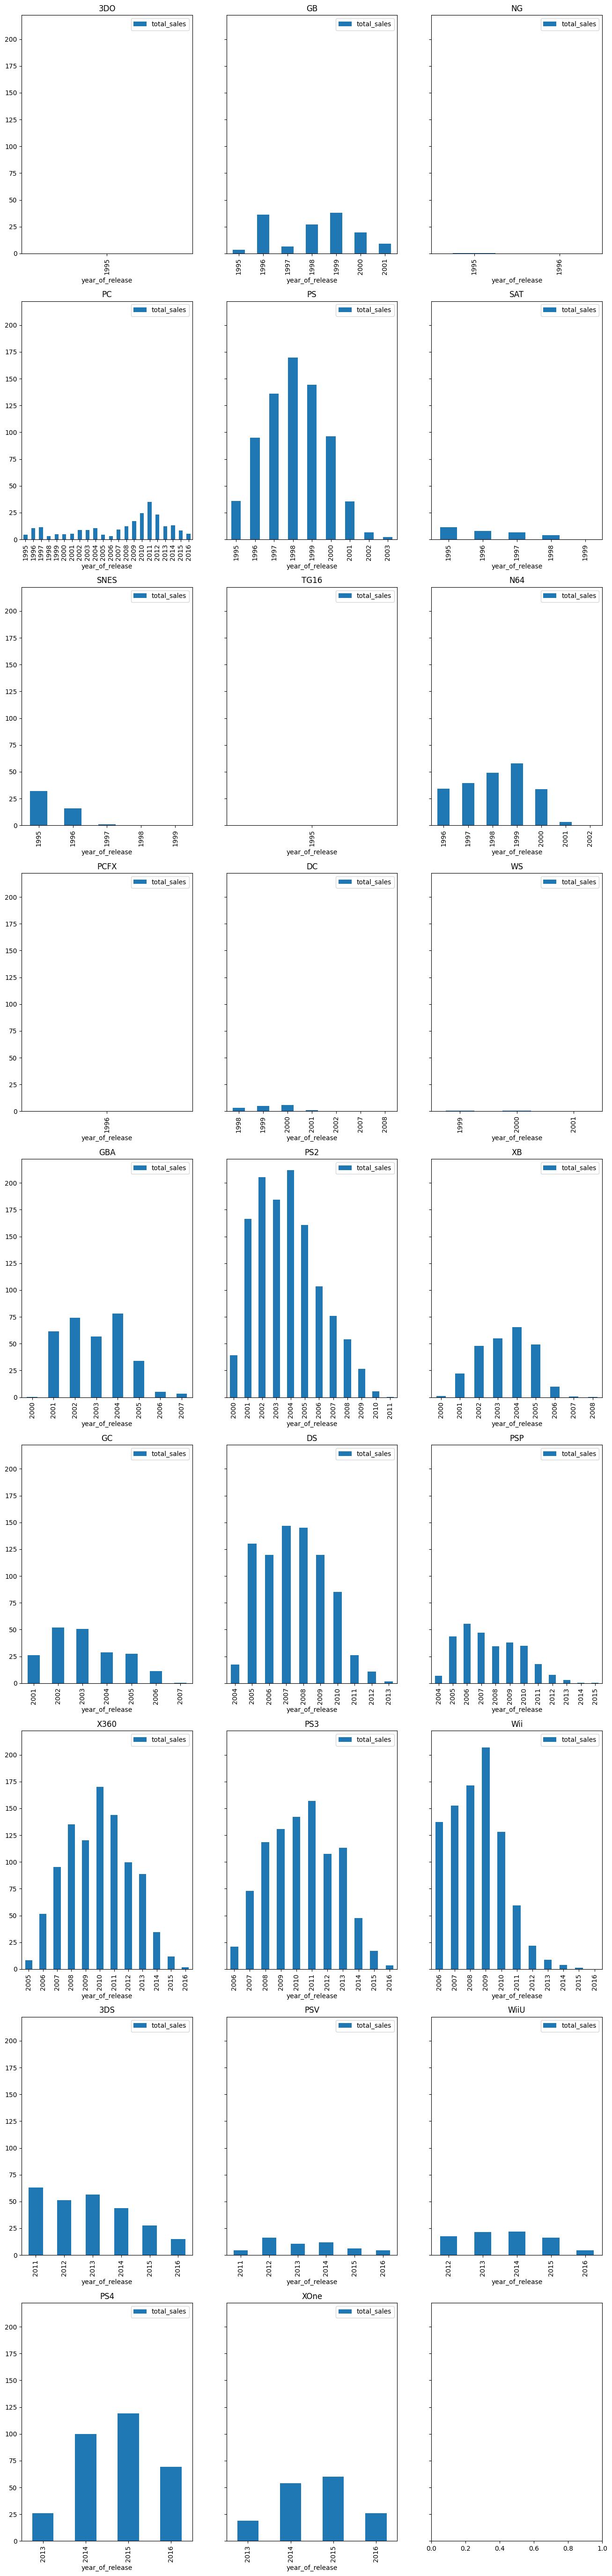

In [75]:
# сделаем выборку и удалим непопулярные платформы, которые существовали меньше двух лет
platform_sales1 = (
    data.query('year_of_release > 1994')
    .pivot_table(index=['year_of_release', 'platform'], values = 'total_sales', aggfunc='sum')
    .reset_index())

fig, axes = plt.subplots(9, 3, figsize=(16, 70), sharey=True)
for platform, ax in zip(platform_sales1['platform'].unique(), axes.flat):
    platform_sales1[platform_sales1['platform']==platform].plot(kind='bar', x='year_of_release', y='total_sales', 
    title=platform, ax=ax)



Можно сделать вывод, что к 2015 году начался сильный спад продаж по всем актуальным платформам. Средний цикл жизни платформы около 7 лет. Соответственно для последующего анализа данных возьмем 2015 и 2016 год. Построим график продаж, а также выделим наиболее популярные платформы.

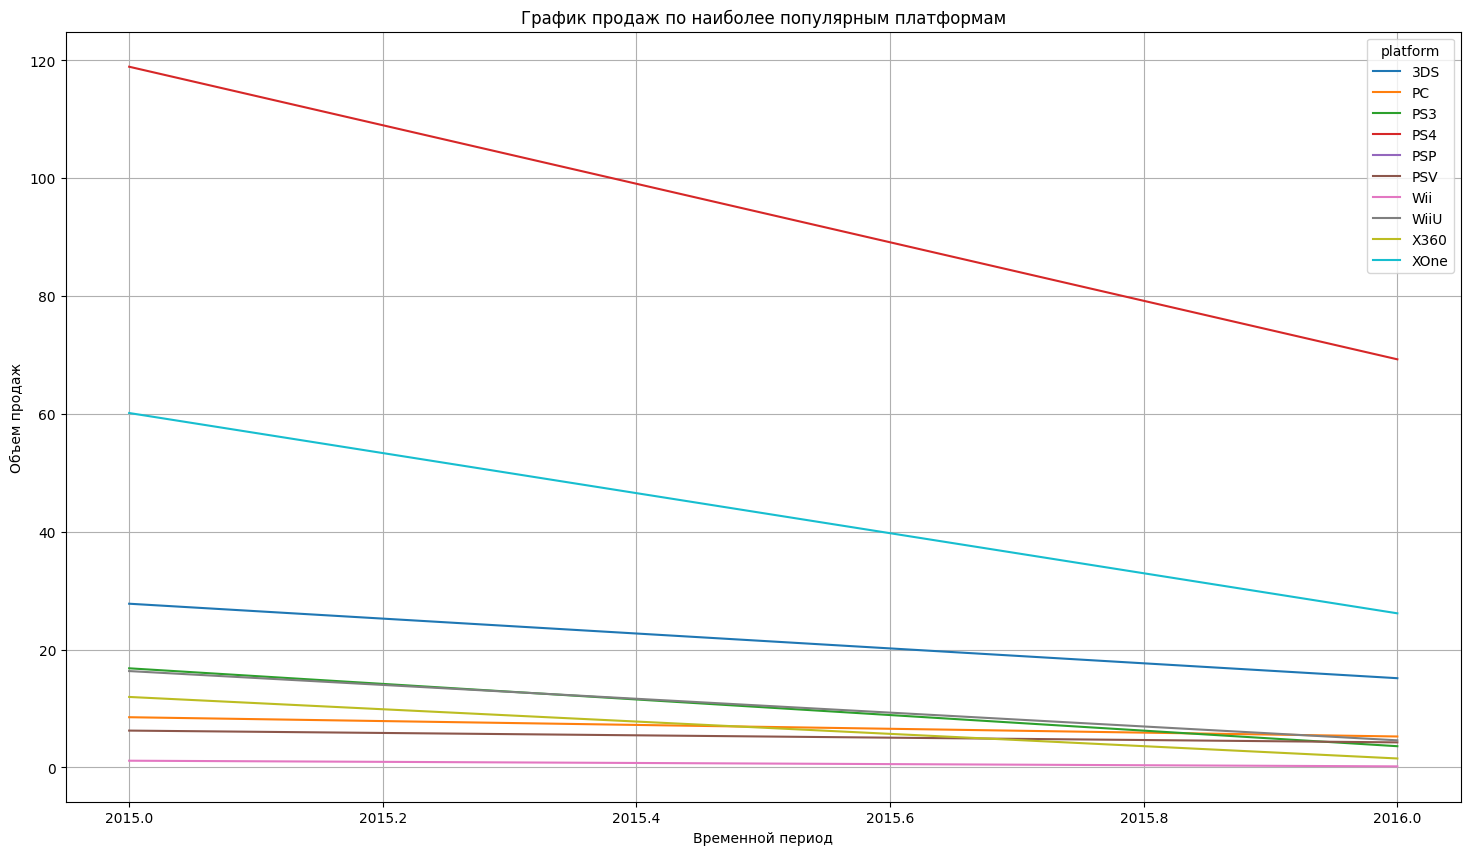

In [76]:
platform_sales_2015 = (data.query('year_of_release > 2014')
    .pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc='sum')
    )

platform_sales_2015.plot(figsize = (18,10), grid = True)
plt.title('График продаж по наиболее популярным платформам')
plt.ylabel('Объем продаж')
plt.xlabel('Временной период')
plt.show;

In [32]:
# вывод данных по продажам по платформам за 2015 и 2016 годы
platform_sales_2015

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


На основании полученных данных можно сделать вывод, что на конец 2016 года существует 3 наиболее популярные платформы: PS4, Xone и 3DS. Также прослеживается динамика падения продаж по всем платформам. 

Построим общую диаграмму рассеивания по всем платформам за 2 года

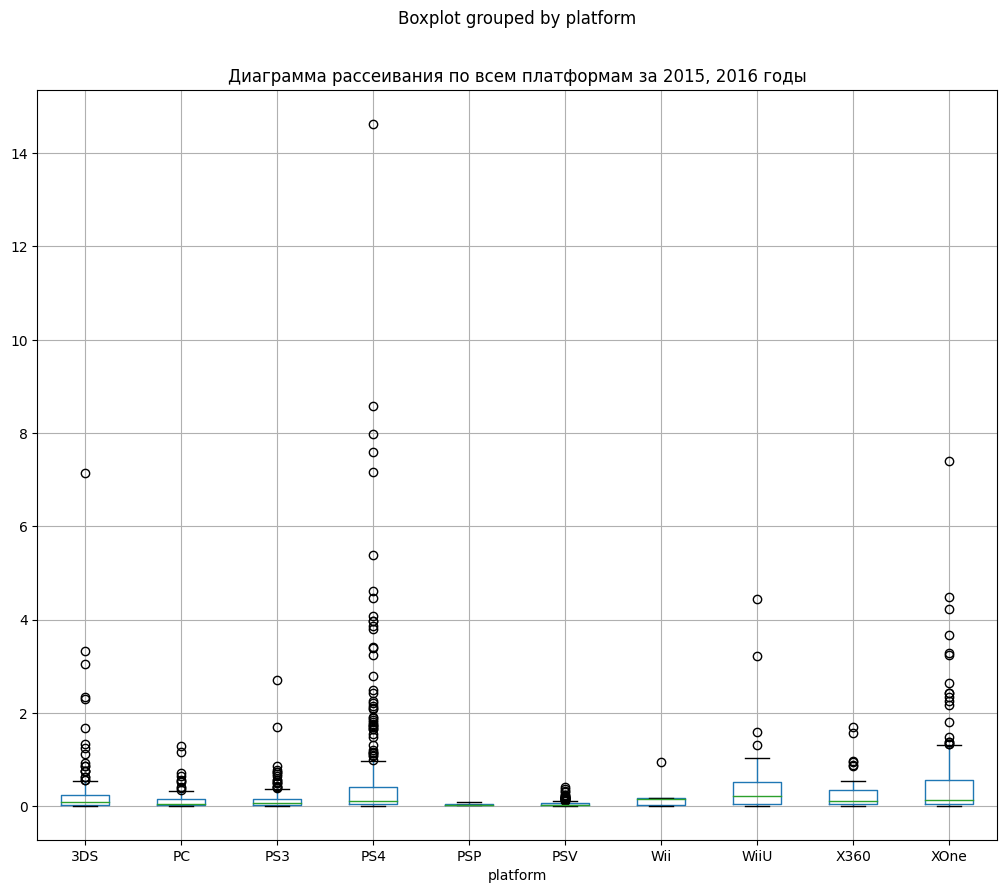

In [79]:
# Создадим отдельную таблицу с данными за 2015-2016 годы
data_2015 = data.query('year_of_release > 2014') 
data_2015.boxplot(column='total_sales', by='platform', figsize=(12,10))
plt.title('Диаграмма рассеивания по всем платформам за 2015, 2016 годы')
plt.show;

Избавимся от выбросов и построим дополнительный график без них

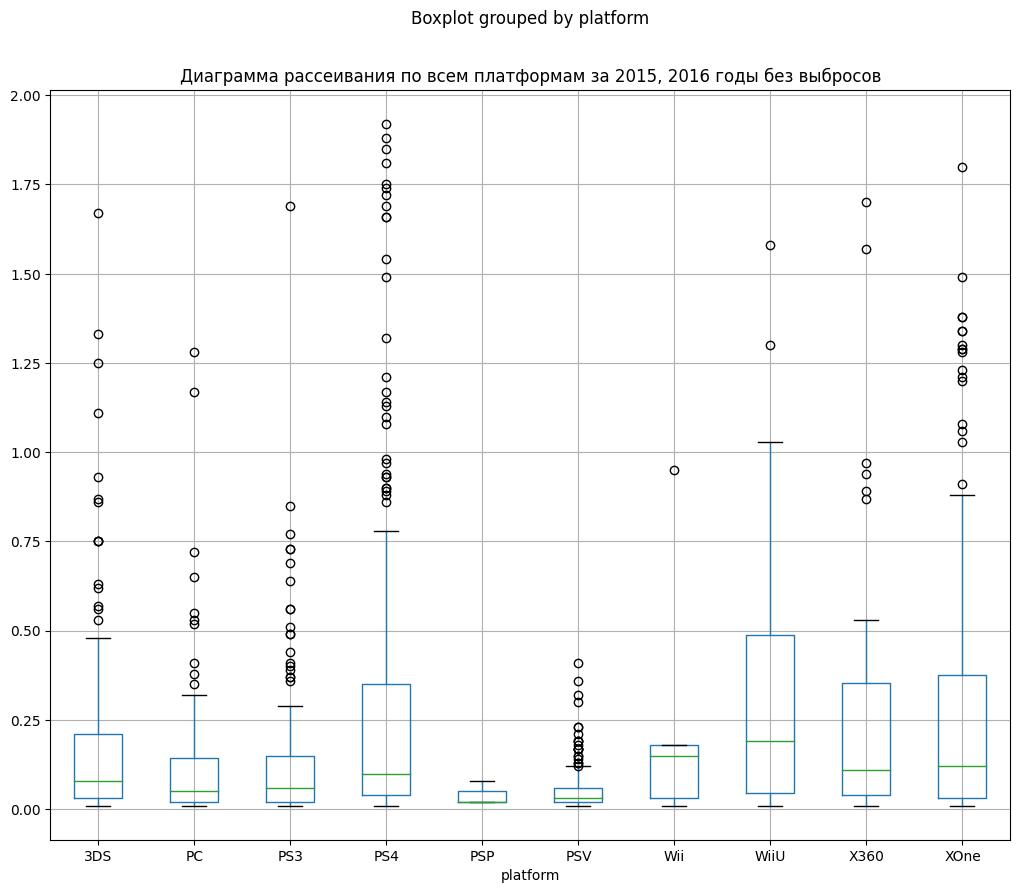

In [80]:
# Создадим отдельную таблицу с данными за 2015-2016 годы
data_2015_1 = data.query('year_of_release > 2014 and total_sales < 2') 
data_2015_1.boxplot(column='total_sales', by='platform', figsize=(12,10))
plt.title('Диаграмма рассеивания по всем платформам за 2015, 2016 годы без выбросов')
plt.show;

In [35]:
data_2015.sort_values('total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,unknown,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16201,The Technomancer,PC,2016,Role-Playing,0.00,0.01,0.00,0.00,56.0,6.8,M,0.01
16188,Darksiders: Warmastered Edition,XOne,2016,Action,0.01,0.00,0.00,0.00,80.0,7.9,M,0.01
16184,Higurashi no Naku Koro ni Iki,PS3,2015,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16182,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.00,0.00,0.00,-1.0,-1.0,T,0.01


Call of Duty: Black Ops 3 действительно по данным Википедии была самой продаваемой игрой на консолях. Соответственно выбросы не являются ошибочными и на данном этапе пока не будем их отбрасывать.

#### Проведем анализ, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Проведем расчет корреляции данных значений и построим диаграмму рассеивания

In [36]:
# Предварительно проверим на наличие пустых значений в столбцах critic_score и user_score в рамках исследуемого периода
data_2015.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

              total_sales  critic_score
total_sales      1.000000      0.498013
critic_score     0.498013      1.000000


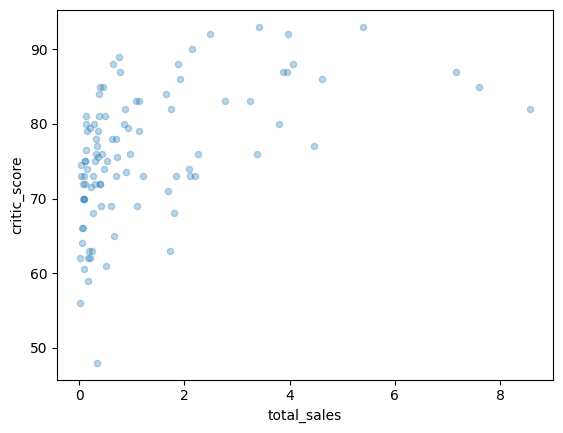

In [81]:
# Построение сводной таблицы по общим продажам и оценкой критиков
data_ps4 = (
    data_2015.query('platform == "PS4" and critic_score != -1')
    .pivot_table(index='total_sales', values = ['critic_score'], aggfunc='median').reset_index()
)
# Расчет коэффициента корреляции
print(data_ps4.corr())

# Построение диаграммы рассеивания
data_ps4.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)
plt.show;

#### Между продажами и оценкой критиков существует слабая положительная корреляция 0.49. Суммарно наибольшее количество продаж приходится на игры с высокими оценками.

             total_sales  user_score
total_sales     1.000000   -0.200946
user_score     -0.200946    1.000000


<Axes: xlabel='total_sales', ylabel='user_score'>

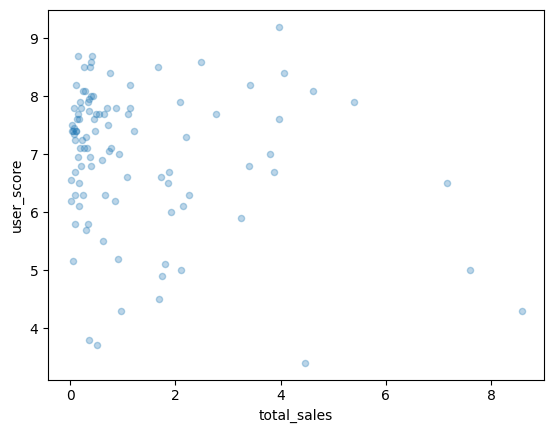

In [38]:
# Построение общей таблицы по общим продажам и оценкой пользователей
data_ps4_user = (
    data_2015.query('platform == "PS4" and user_score != -1')
    .pivot_table(index='total_sales', values = ['user_score'], aggfunc='median').reset_index()
)

# Расчет коэффициента корреляции
print(data_ps4_user.corr())

# Построение диаграммы рассеивания
data_ps4_user.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)

Посмотрим взаимосвязь между указанными параметрами по всем платформам за весь период продаж по всем платформам. 

              total_sales  critic_score
total_sales      1.000000      0.297743
critic_score     0.297743      1.000000


<Axes: xlabel='total_sales', ylabel='critic_score'>

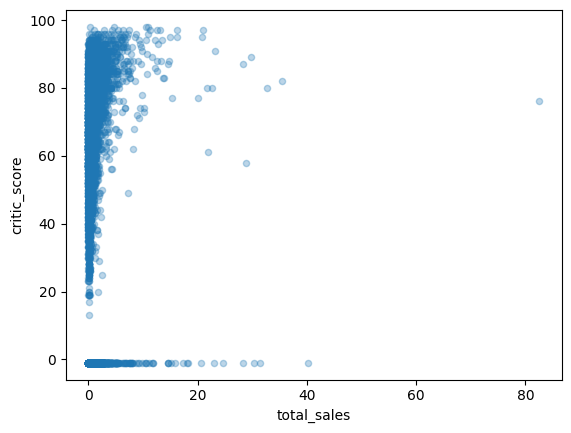

In [39]:
# Построение сводной таблицы по общим продажам и оценкой критиков
data_critic_all = data.pivot_table(index='total_sales', values = ['critic_score'], aggfunc='median').reset_index()
data_critic_all = data_critic_all.query('critic_score != -1')
# Расчет коэффициента корреляции
print(data_critic_all.corr())

# Построение диаграммы рассеивания
data.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)

             total_sales  user_score
total_sales     1.000000    0.200514
user_score      0.200514    1.000000


<Axes: xlabel='total_sales', ylabel='user_score'>

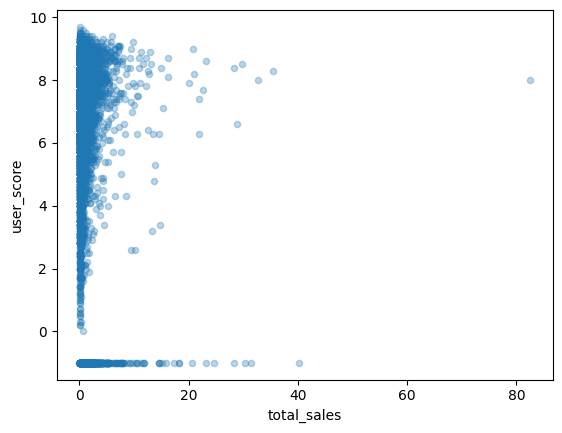

In [40]:
# Построение сводной таблицы по общим продажам и оценкой критиков
data_user_all = data.pivot_table(index='total_sales', values = ['user_score'], aggfunc='median').reset_index()
data_user_all = data_user_all.query('user_score != -1')

# Расчет коэффициента корреляции
print(data_user_all.corr())

# Построение диаграммы рассеивания
data.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)

При анализе общего массива данных также прослеживается слабая положительная корреляция между продажами и оценкой критиков. Между продажами и оценкой пользователей также отсутствует корреляция. Самые высокие продажи приходятся на игры с высокими оценками. Возможно это связано с большой популярностью платформы PS4, ростом популярности возможностью покупки игр онлайн и периодической системой скидок на непопулярные игры. 

#### Анализ распределения игр по жанрам

Составим сводную таблицу продаж по жанрам за исследуемый период

Создадим таблицу с данными за 2016 год в соотвтетсвии с условием задания, что не берем данные, за предыдущие периоды

In [41]:
data_2016 = data.query('year_of_release == 2016')

In [42]:
# формирование свобдной таблицы по жанрам и продажам
data_genre = (
    data_2016.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False).reset_index()
    )

# вывод таблицы с сортировкой по убыванию продаж
data_genre

,genre,total_sales
0,Shooter,38.22
1,Action,30.11
2,Sports,23.49
3,Role-Playing,18.18
4,Fighting,4.47
5,Adventure,3.82
6,Platform,3.23
7,Racing,2.79
8,Misc,2.60
9,Simulation,1.89


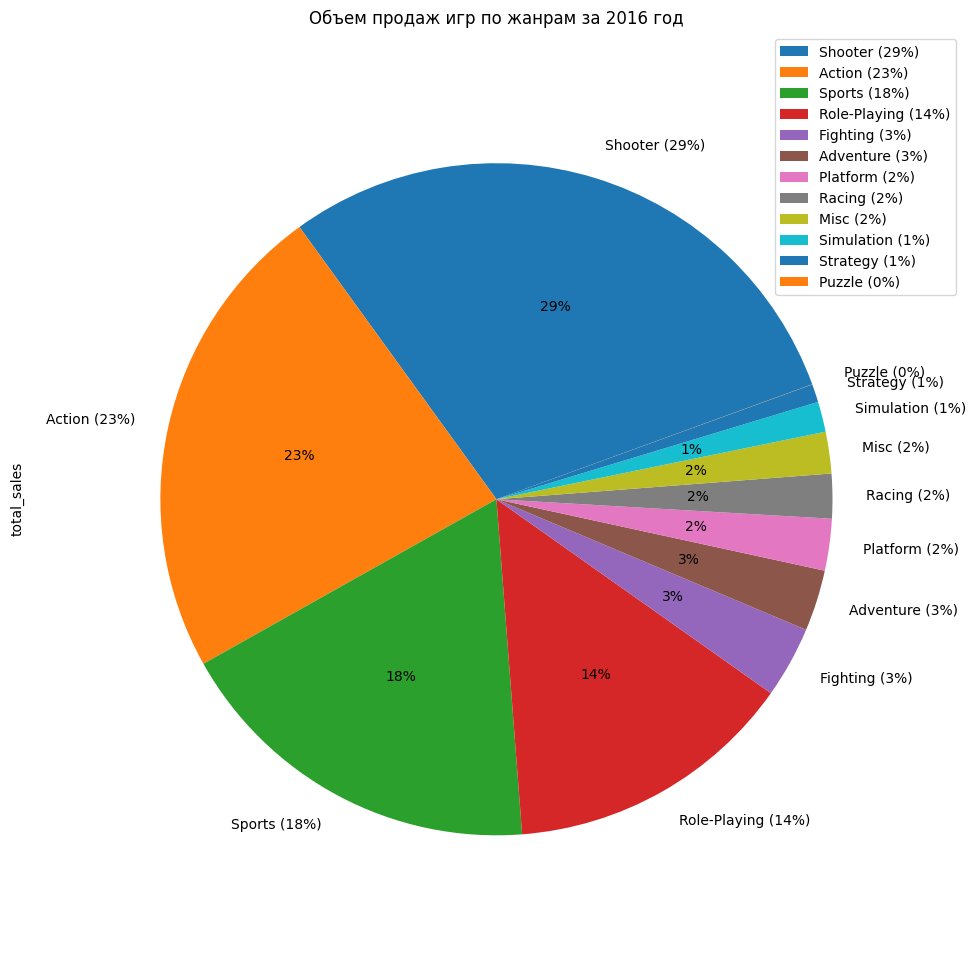

In [82]:
# Построим круговую диаграмму по жанрам
total = data_genre['total_sales'].sum()

# Зададим переменную для вывода в дальнейшем значени процентов в легенде диаграммы.
labels = ([f"{n} ({v/total:1.0%})" for n,v 
           in zip(data_genre['genre'], data_genre['total_sales'])]
         )

# Функция для удаления обозначений с диаграммы, которые меньше 1%
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > 0.9 else ''

data_genre.plot(
    kind='pie', y='total_sales', autopct=my_autopct, startangle =20, radius=0.9, figsize=(10,10), labels=labels);
plt.tight_layout()
plt.title('Объем продаж игр по жанрам за 2016 год')
plt.show;


Некоторые жанры имеют значительно большую долю продаж по сравнению с другими. Можно выделить 4 наиболее популярных жанра продаж, на которые приходится суммарно 90% продаж. Это жанры: 
- Shooter - 35%
- Action - 23%
- Sports - 18%
- Role-Playing - 14%. 

Самые малые продажи приходятся на жанр Puzzle - менее 1%.

#### Промежуточные выводы

В рамках исследовательского анализа данных было сделано:
1. Проанализирован выпуск игр за все время и изменение данных по продажам по платформам: 
- с 1994 года заметен значительный прирост выпуска игр до 2004 года, далее прослеживается отрицательная динамика.
- Средний цикл жизни платформы около 7 лет. 
- к 2015 году по большинству платформ продажи стремятся к нулю
- С 2015 наблюдается отрицательная динамика по популярным платформам
- На основе полученных данных для последующего анализа был выбран период с 2015 по 2016 год
- Их актуальных популярных платформ можно выделить три: PS4, Xone и 3DS
- Выбросы в данных по продажам не являются ошибками, т.к. связаны с популярными играми, занявшими высокие позиции в рейтингах популярности по количеству продаж.
2. Проведен анализ, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
- Между продажами и оценкой критиков по платформе PS4 существует слабая положительная корреляция 0.49, между продажами и оценкой пользователей корреляция отсутствует . Данный факт может быть связан с ростом популярности способа приобретения игр онлайн, а также различными дисконтными предложениями на непопулярные игры. 
-При анализе связи продаж и оценок критиков прослеживается слабая положительная корреляция. Корреляция между оценками пользователей и продажами остуствует. Самые высокие продажи приходятся на игры с высокими оценками. 
3. Проведен анализ распределения игр по жанрам. Некоторые жанры имеют значительно большую долю продаж по сравнению с другими. Можно выделить 4 наиболее популярных жанра продаж, на которые приходится суммарно 90% продаж. Это жанры: 
- Shooter - 35%
- Action - 23%
- Sports - 18%
- Role-Playing - 14%. 

Самые малые продажи приходятся на жанр Puzzle - менее 1%.

### Составление портрета пользователя каждого региона

#### Определим самые поплуярные платформы для каждого региона

In [44]:
# Таблица продаж для региона Северная Америка
data_2016_platform = (
    data_2016.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False).reset_index()
    )

data_2016_platform

,platform,na_sales
0,PS4,21.49
1,XOne,14.27
2,3DS,4.14
3,WiiU,2.10
4,PC,1.36
5,X360,0.69
6,PS3,0.67
7,PSV,0.15
8,Wii,0.06


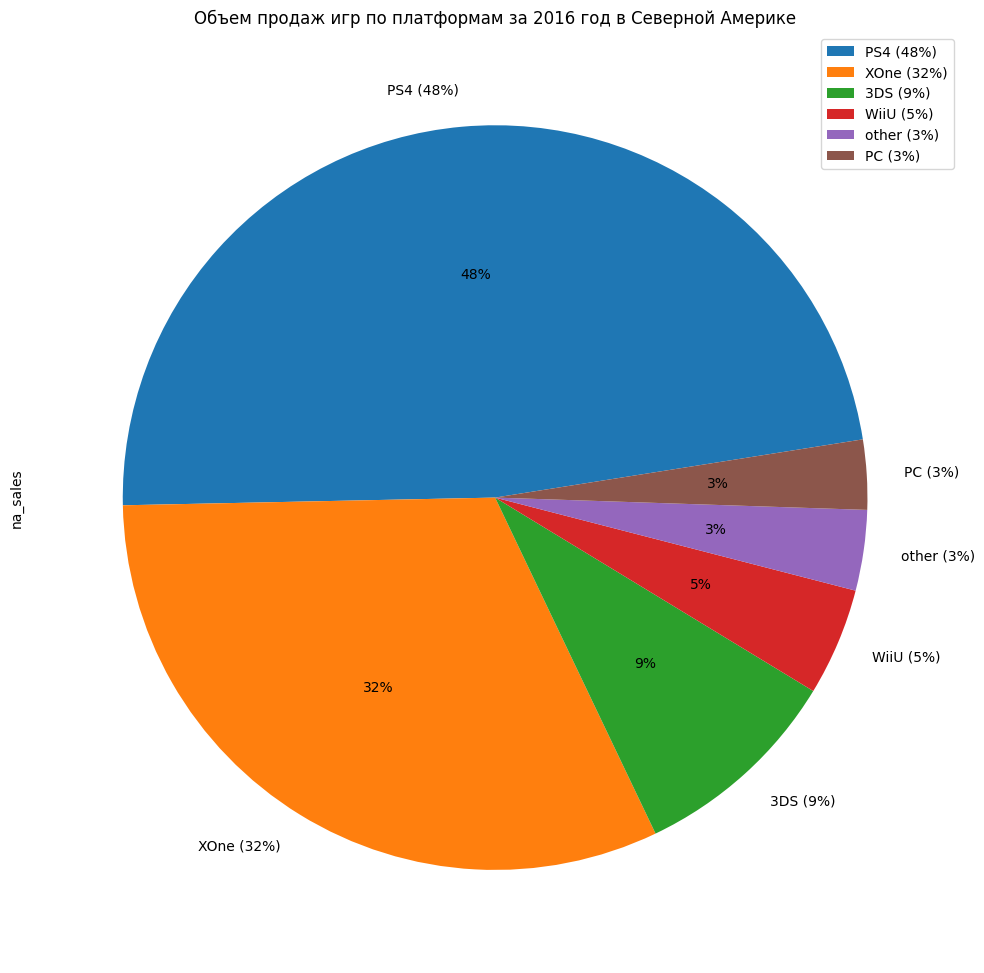

In [90]:

data_2016_platform.loc[data_2016_platform['na_sales'] < 1, 'platform'] = 'other'
data_2016_platform = (data_2016_platform.groupby('platform')['na_sales'].sum()
                    .reset_index().sort_values('na_sales', ascending=False)
                     )

# Построим круговую диаграмму по полученным данным
total = data_2016_platform['na_sales'].sum()

# Зададим переменную для вывода в дальнейшем значени процентов в легенде диаграммы.
labels = ([f"{n} ({v/total:1.0%})" for n,v 
           in zip(data_2016_platform['platform'], data_2016_platform['na_sales'])]
         )

# Функция для удаления обозначений с диаграммы, которые меньше 1%
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > 0.9 else ''

data_2016_platform.plot(
    kind='pie', y='na_sales', autopct=my_autopct, startangle = 9, figsize=(10,10), labels=labels);
plt.tight_layout()
plt.title('Объем продаж игр по платформам за 2016 год в Северной Америке')
plt.show;

In [46]:
# Таблица продаж для региона Европа
data_2016_platform_eu = (data_2016.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                        .sort_values('eu_sales', ascending=False).reset_index()
                        )

data_2016_platform_eu

,platform,eu_sales
0,PS4,31.78
1,XOne,9.63
2,PC,3.53
3,3DS,2.33
4,WiiU,1.48
5,PS3,1.26
6,X360,0.71
7,PSV,0.39
8,Wii,0.11


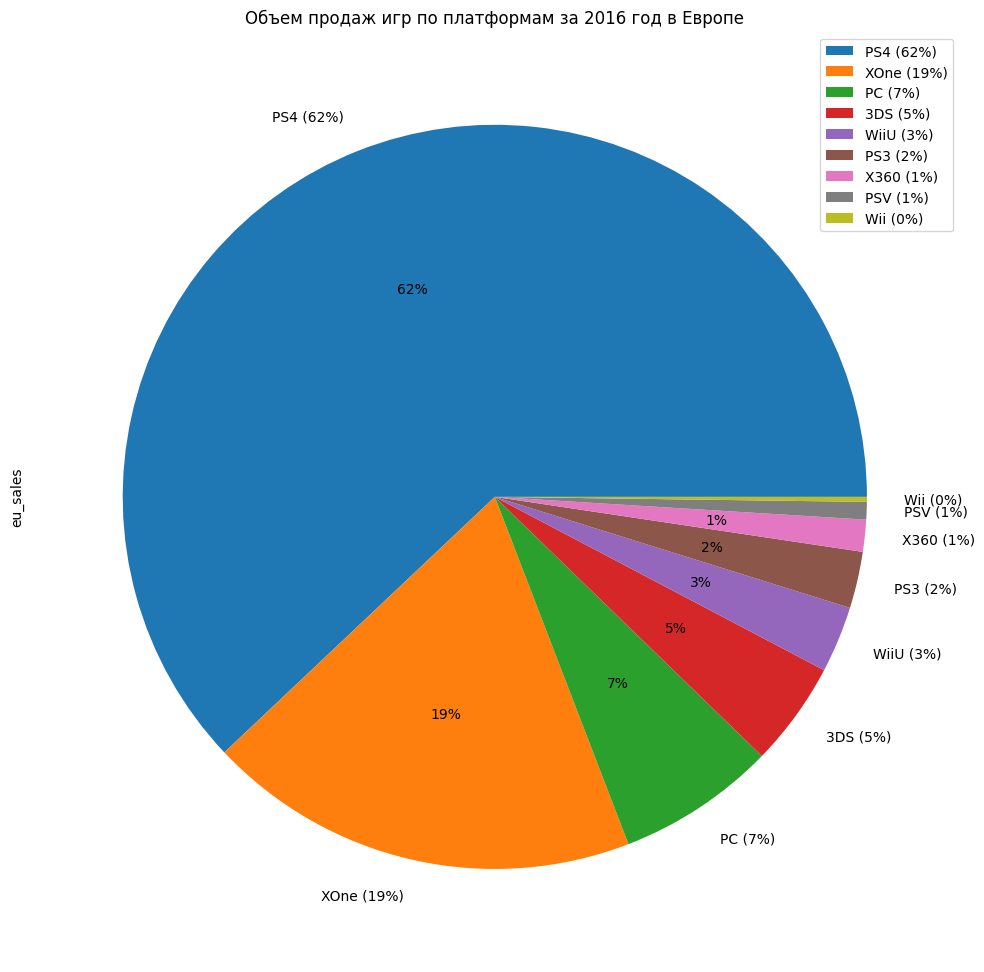

In [89]:
# Построим круговую диаграмму по полученным данным

total = data_2016_platform_eu['eu_sales'].sum()

# Зададим переменную для вывода в дальнейшем значени процентов в легенде диаграммы.
labels = ([f"{n} ({v/total:1.0%})" for n,v 
           in zip(data_2016_platform_eu['platform'], data_2016_platform_eu['eu_sales'])]
         )

# Функция для удаления обозначений с диаграммы, которые меньше 1%
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > 0.9 else ''


data_2016_platform_eu.plot(
    kind='pie', y='eu_sales', autopct=my_autopct, figsize=(10,10), labels=labels);
plt.tight_layout()
plt.title('Объем продаж игр по платформам за 2016 год в Европе')
plt.show;

In [48]:
# Таблица продаж для региона Япония
data_2016_platform_jp = (data_2016.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                        .sort_values('jp_sales', ascending=False).reset_index()
                        )
data_2016_platform_jp

,platform,jp_sales
0,3DS,8.03
1,PS4,5.74
2,PSV,3.56
3,PS3,1.30
4,WiiU,0.67
5,XOne,0.01
6,PC,0.00
7,Wii,0.00
8,X360,0.00


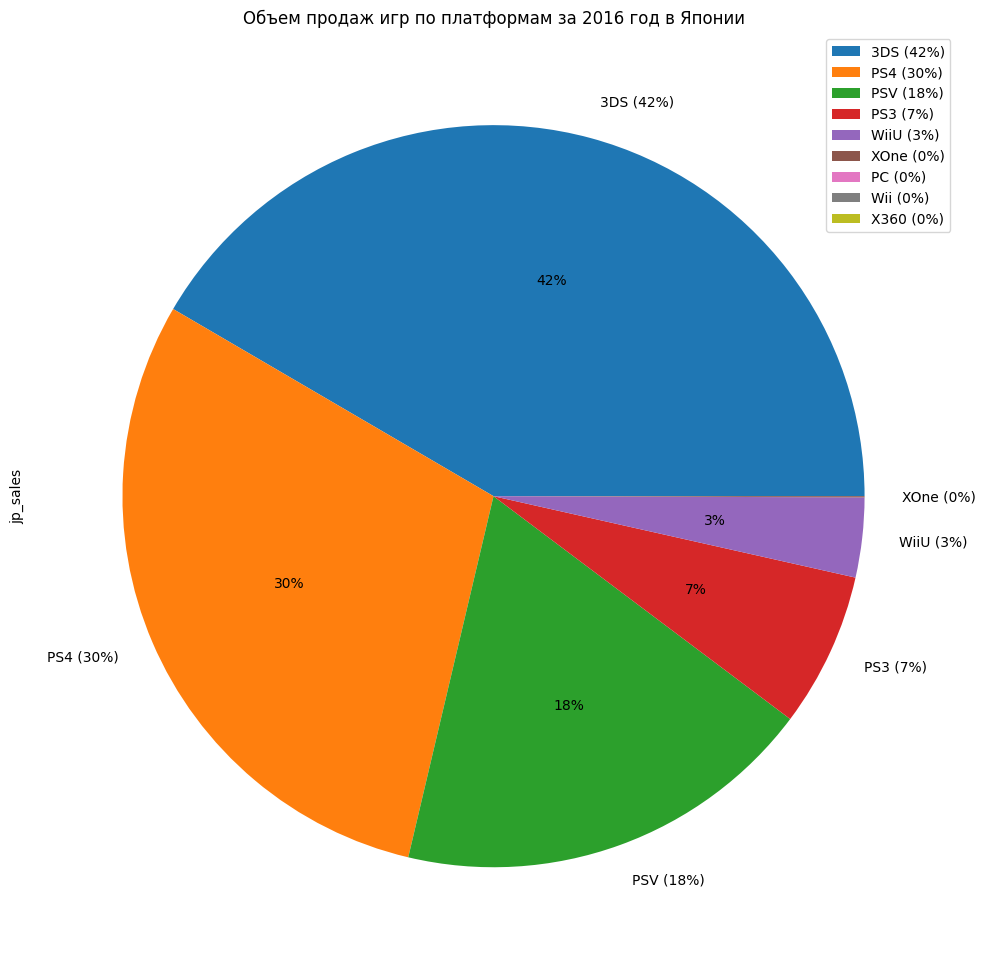

In [88]:
# Построим круговую диаграмму по полученным данным

total = data_2016_platform_jp['jp_sales'].sum()

# Зададим переменную для вывода в дальнейшем значени процентов в легенде диаграммы.
labels = ([f"{n} ({v/total:1.0%})" for n,v 
           in zip(data_2016_platform_jp['platform'], data_2016_platform_jp['jp_sales'])]
         )


data_2016_platform_jp.plot(
    kind='pie', y='jp_sales', autopct=my_autopct, figsize=(10,10), labels=labels);
plt.tight_layout()
plt.title('Объем продаж игр по платформам за 2016 год в Японии')
plt.show;

In [50]:
# Таблица продаж для остальных регионов
data_2016_platform_other = (data_2016.pivot_table(index='platform', values='other_sales', aggfunc='sum')
                        .sort_values('other_sales', ascending=False).reset_index()
                        )
data_2016_platform_other

,platform,other_sales
0,PS4,10.24
1,XOne,2.24
2,3DS,0.64
3,PS3,0.37
4,PC,0.36
5,WiiU,0.35
6,PSV,0.15
7,X360,0.12
8,Wii,0.01


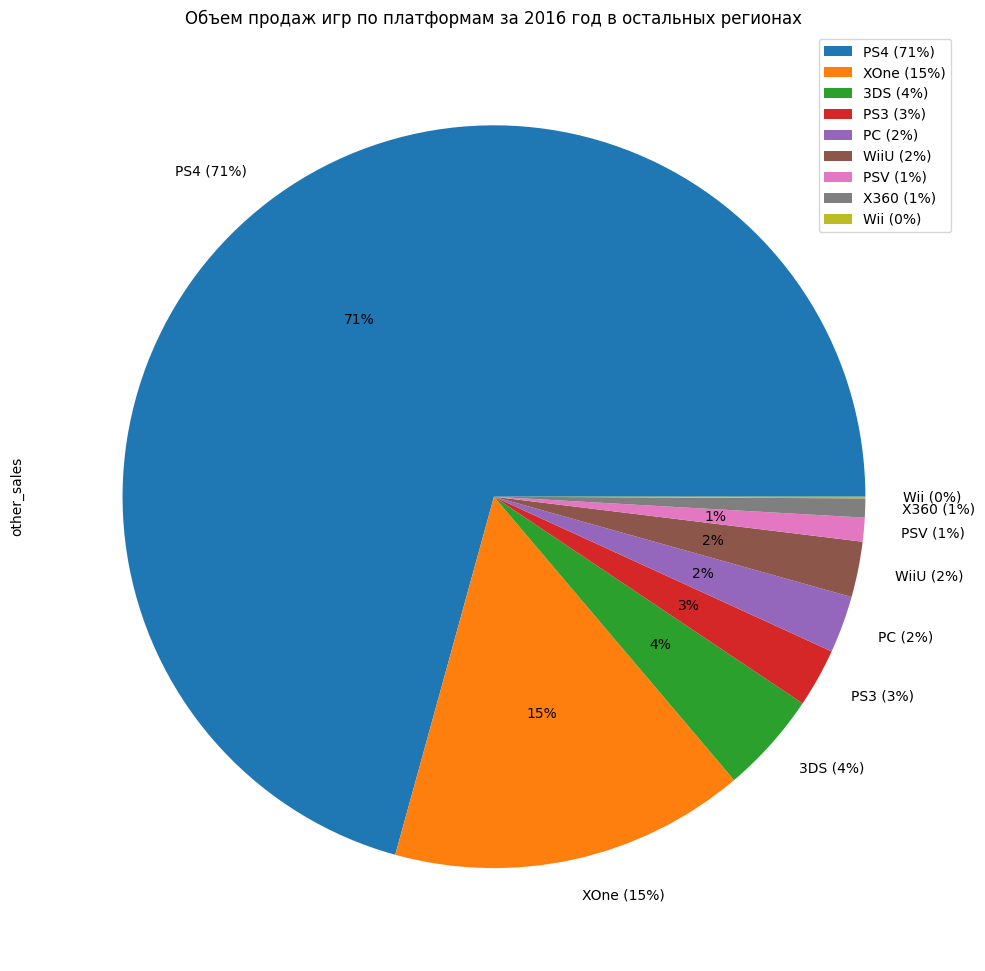

In [87]:
# Построим круговую диаграмму по полученным данным

total = data_2016_platform_other['other_sales'].sum()

# Зададим переменную для вывода в дальнейшем значени процентов в легенде диаграммы.
labels = ([f"{n} ({v/total:1.0%})" for n,v 
           in zip(data_2016_platform_other['platform'], data_2016_platform_other['other_sales'])]
         )

data_2016_platform_other.plot(
    kind='pie', y='other_sales', autopct=my_autopct, figsize=(10,10), labels=labels);
plt.tight_layout()
plt.title('Объем продаж игр по платформам за 2016 год в остальных регионах')
plt.show;

На основании полученных данных получается следующая картина: Топ 5 популярных платформ по регионам выглядят следующим образом:
- Северная Америка: PS4 - 48%, XOne - 32%, 3DS - 9%, WiiU - 5%, PC - 3%
- Европа: PS4 - 62%, XOne - 19%, PC - 7%, 3DS - 5%, PS3 - 3%
- Япония: 3DS - 42%, PS4 - 30%, PSV - 18%, PS3 - 7%, WiiU - 3%
- Другие регионы:  PS4 - 71%, XOne - 15%, 3DS - 4%, PS3 - 3%,  PC - 2%

Можно отметить среди данной выборки, что самая популярная платформа в мире PS4. В Японии отдают предпочтения портативным консолям, а также платформам японского производства.

#### Определим самые популярные жанры для каждого региона

In [52]:
# Таблица продаж для региона Северная Америка
data_2016_genre_na = (data_2016.pivot_table(index='genre', values='na_sales', aggfunc='sum')
                     .sort_values('na_sales', ascending=False).reset_index()
                     )

data_2016_genre_na

,genre,na_sales
0,Shooter,16.24
1,Action,9.29
2,Sports,7.54
3,Role-Playing,5.89
4,Fighting,1.84
5,Platform,1.29
6,Adventure,0.95
7,Misc,0.76
8,Racing,0.73
9,Strategy,0.24


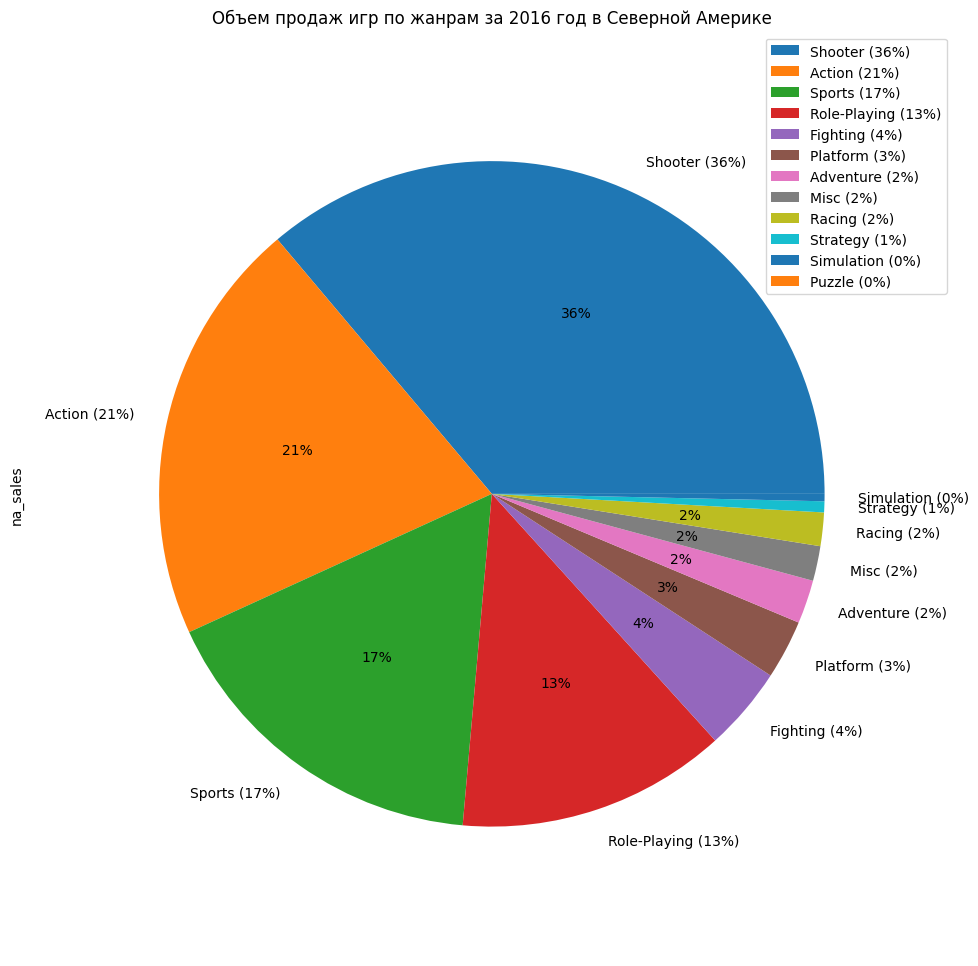

In [91]:
# Построим круговую диаграмму по полученным данным

total = data_2016_genre_na['na_sales'].sum()

# Зададим переменную для вывода в дальнейшем значени процентов в легенде диаграммы.
labels = ([f"{n} ({v/total:1.0%})" for n,v 
           in zip(data_2016_genre_na['genre'], data_2016_genre_na['na_sales'])]
         )

data_2016_genre_na.plot(kind='pie', y='na_sales', radius = 0.9, autopct=my_autopct, figsize=(10,10), labels=labels);
plt.tight_layout()
plt.title('Объем продаж игр по жанрам за 2016 год в Северной Америке')
plt.show;

In [54]:
# Таблица продаж для региона Европа
data_2016_genre_eu = (data_2016.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                     .sort_values('eu_sales', ascending=False).reset_index()
                     )

data_2016_genre_eu

,genre,eu_sales
0,Shooter,15.90
1,Sports,12.01
2,Action,10.68
3,Role-Playing,4.28
4,Racing,1.77
5,Platform,1.39
6,Fighting,1.34
7,Adventure,1.32
8,Simulation,1.27
9,Misc,0.66


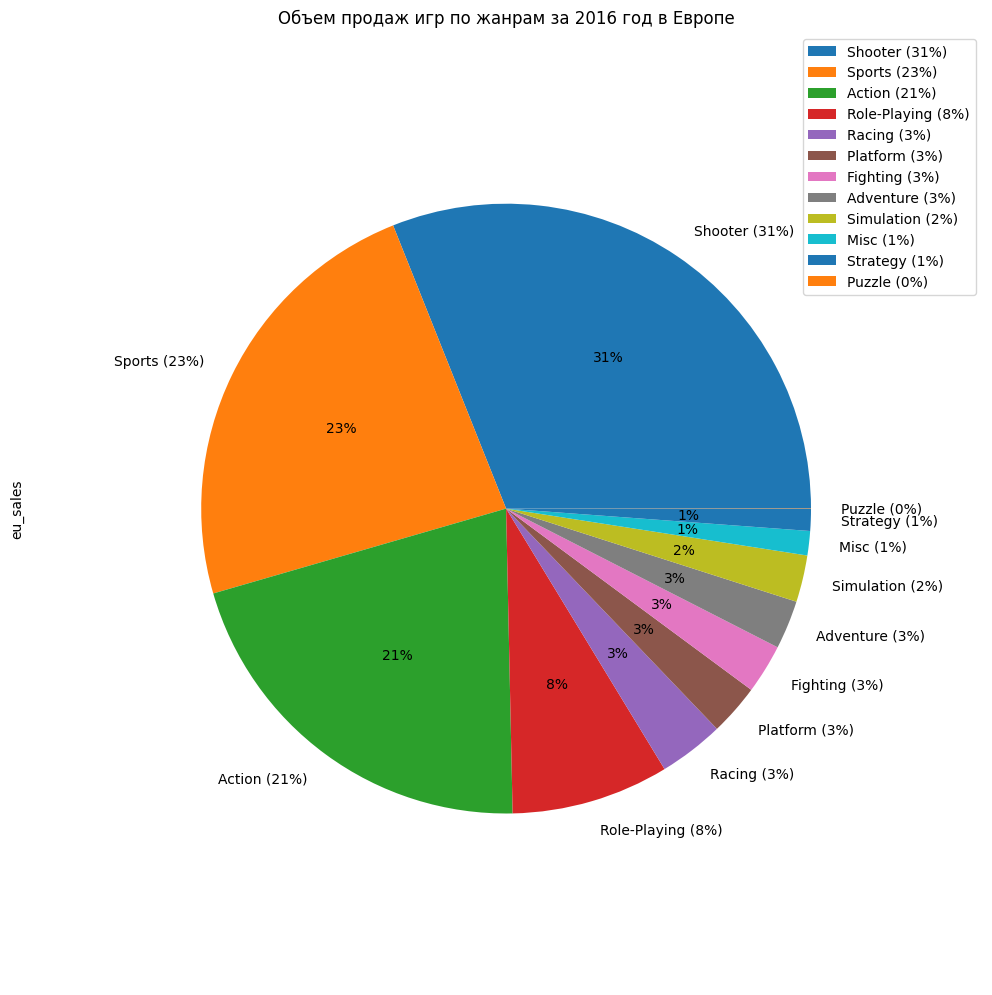

In [92]:
# Построим круговую диаграмму по полученным данным

total = data_2016_genre_eu['eu_sales'].sum()

# Зададим переменную для вывода в дальнейшем значени процентов в легенде диаграммы.
labels = ([f"{n} ({v/total:1.0%})" for n,v 
           in zip(data_2016_genre_eu['genre'], data_2016_genre_eu['eu_sales'])]
         )

data_2016_genre_eu.plot(kind='pie', y='eu_sales', radius = 0.8, autopct=my_autopct, figsize=(10,10), labels=labels);
plt.tight_layout()
plt.title('Объем продаж игр по жанрам за 2016 год в Европе')
plt.show;

In [56]:
# Таблица продаж для региона Япония
data_2016_genre_jp = (data_2016.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                     .sort_values('jp_sales', ascending=False).reset_index()
                     )

data_2016_genre_jp

,genre,jp_sales
0,Action,7.07
1,Role-Playing,6.61
2,Adventure,1.18
3,Shooter,1.06
4,Misc,1.04
5,Sports,0.92
6,Fighting,0.75
7,Simulation,0.33
8,Strategy,0.23
9,Platform,0.11


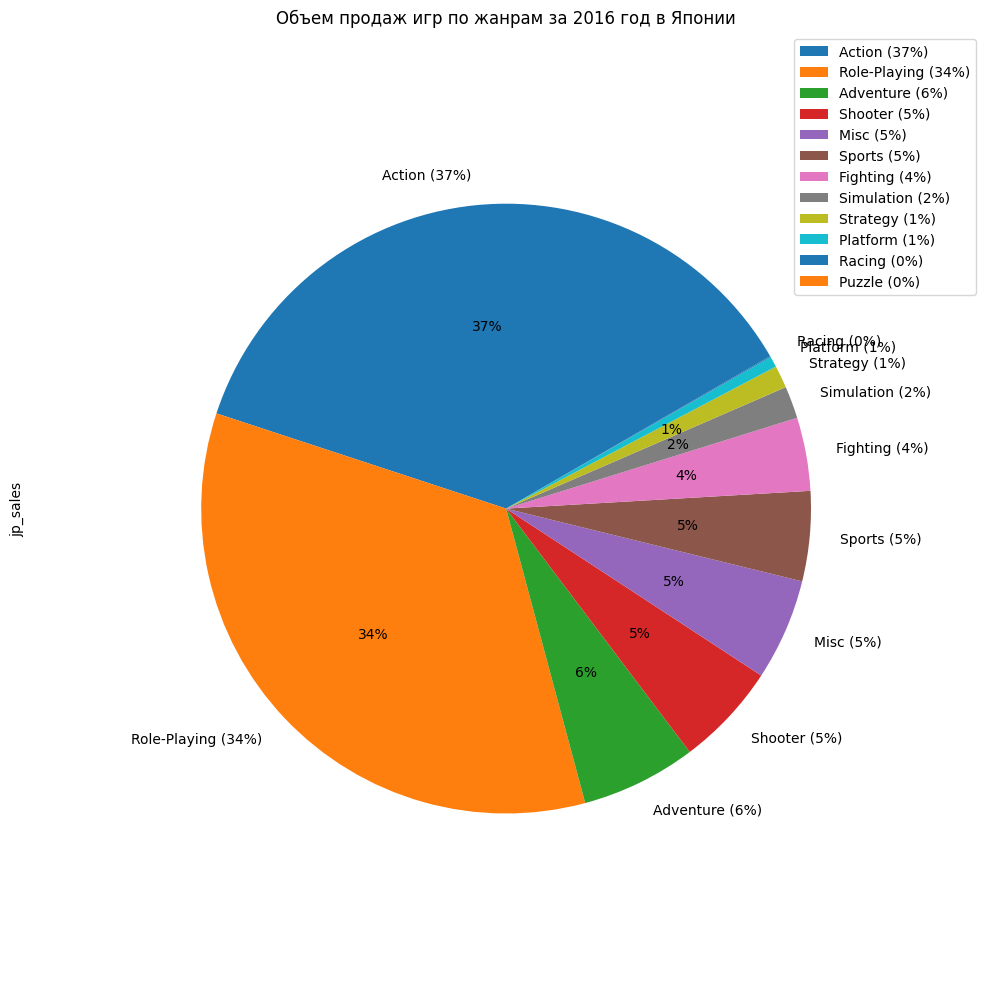

In [93]:
# Построим круговую диаграмму по полученным данным

total = data_2016_genre_jp['jp_sales'].sum()

# Зададим переменную для вывода в дальнейшем значени процентов в легенде диаграммы.
labels = ([f"{n} ({v/total:1.0%})" for n,v 
           in zip(data_2016_genre_jp['genre'], data_2016_genre_jp['jp_sales'])]
         )

data_2016_genre_jp.plot(kind='pie', y='jp_sales', startangle = 30, radius = 0.8, autopct=my_autopct, figsize=(10,10), labels=labels);
plt.tight_layout()
plt.title('Объем продаж игр по жанрам за 2016 год в Японии')
plt.show;

In [58]:
# Таблица продаж для остальных регионов
data_2016_genre_other = (data_2016.pivot_table(index='genre', values='other_sales', aggfunc='sum')
                     .sort_values('other_sales', ascending=False).reset_index()
                     )

data_2016_genre_other

,genre,other_sales
0,Shooter,5.02
1,Action,3.07
2,Sports,3.02
3,Role-Playing,1.40
4,Fighting,0.54
5,Platform,0.44
6,Adventure,0.37
7,Racing,0.28
8,Misc,0.14
9,Simulation,0.13


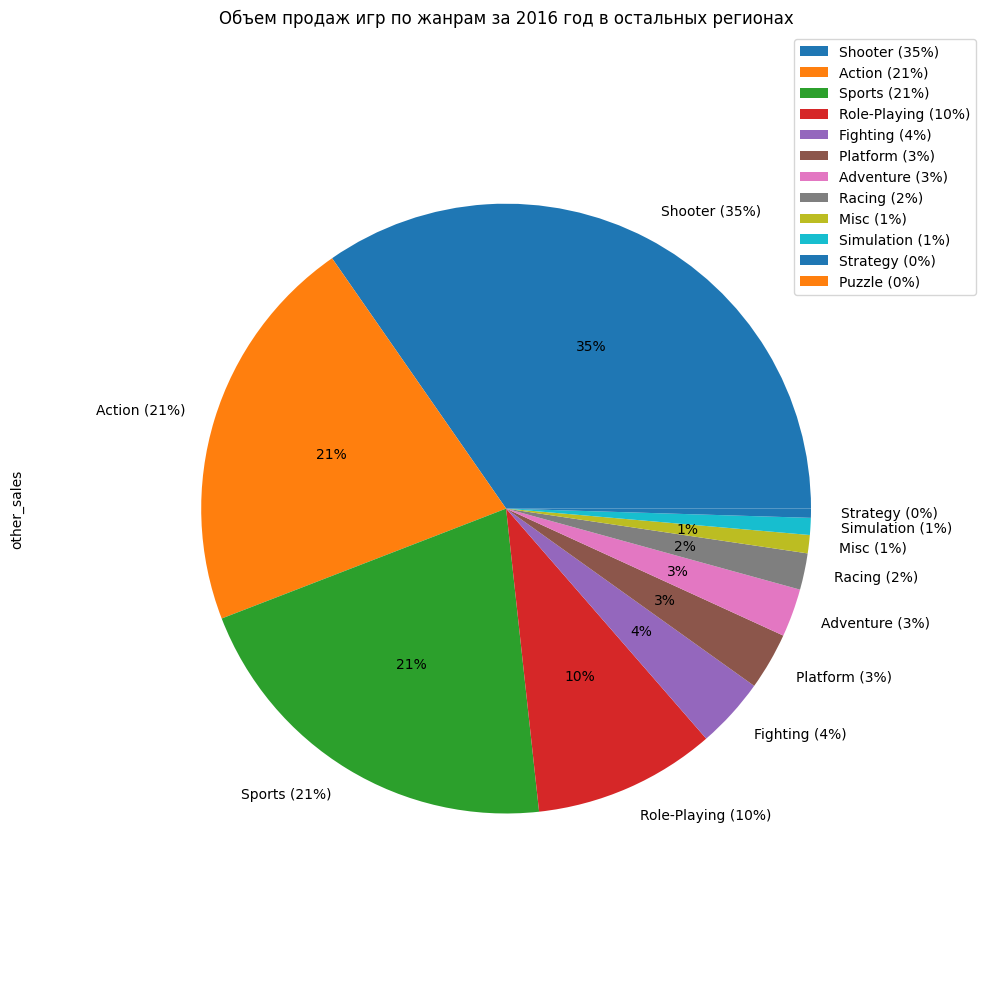

In [95]:
# Построим круговую диаграмму по полученным данным

total = data_2016_genre_other['other_sales'].sum()

# Зададим переменную для вывода в дальнейшем значени процентов в легенде диаграммы.
labels = ([f"{n} ({v/total:1.0%})" for n,v 
           in zip(data_2016_genre_other['genre'], data_2016_genre_other['other_sales'])]
         )

data_2016_genre_other.plot(kind='pie', y='other_sales',radius=0.8, autopct=my_autopct, figsize=(10,10), labels=labels);
plt.tight_layout()
plt.title('Объем продаж игр по жанрам за 2016 год в остальных регионах')
plt.show;

На основании полученных данных получается следующая картина: Топ 5 популярных жанров по регионам выглядят следующим образом:
- Северная Америка: Shooter - 36%, Action - 21%, Sports - 17%, Role-Playing - 13%, Racing - 4%
- Европа: Shooter - 31%, Action - 23%, Sports - 21%, Role-Playing - 8%, Racing - 3%
- Япония: Action - 37%, Role-Playing - 34%, Shooter - 6%, Misc - 5%, Adventure - 5%
- Остальные регионы: Shooter - 35%, Action - 21%, Sports - 21%, Role-Playing - 10%, Fighting - 4%

В Северной Америке, Европе и в других регионах популярные жанры схожи и их доля примерно одинакова. В Японии ТОП-5 популярных жанров отличаются, это может быть связано с влиянием японской культуры, а также на это влияет популярность портативных консолей, на которых не так удобно играть в шутеры.

#### Изучение влияния рейтинга ESRB на продажи в отдельном регионе

In [60]:
# Таблица продаж для региона Япония
data_2016.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)

,na_sales
rating,
M,17.06
T,9.20
E,7.97
unknown,6.89
E10+,3.81


In [61]:
# Таблица продаж для региона Европа
data_2016.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)

,eu_sales
rating,
M,18.07
E,13.67
T,9.99
unknown,5.68
E10+,3.81


In [62]:
# Таблица продаж для региона Япония
data_2016.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)

,jp_sales
rating,
unknown,14.03
T,2.43
M,1.30
E,1.10
E10+,0.45


In [63]:
# Таблица продаж для остальных регионов
data_2016.pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False)

,other_sales
rating,
M,5.41
T,3.17
E,3.10
unknown,1.74
E10+,1.06


По полученным данным можно сделать вывод, что в Северной Америке, Европе и других регионах наиболее популярны игры с рейтингом "M", в Японии игры без рейтинга.

#### Промежуточные выводы

В рамках четвертого этапа исследования было сделано:
1. Определены ТОП 5 самых популярных платформ для каждого региона:
- Северная Америка: PS4 - 48%, XOne - 32%, 3DS - 9%, WiiU - 5%, PC - 3%
- Европа: PS4 - 62%, XOne - 19%, PC - 7%, 3DS - 5%, PS3 - 3%
- Япония: 3DS - 42%, PS4 - 30%, PSV - 18%, PS3 - 7%, WiiU - 3%
- Другие регионы:  PS4 - 71%, XOne - 15%, 3DS - 4%, PS3 - 3%,  PC - 2%

Можно отметить среди данной выборки, что самая популярная платформа в мире PS4. В Японии отдают предпочтения портативным консолям, а также платформам японского производства.


2. Определены ТОП 5 самых популярных жанров для каждого региона: 
- Северная Америка: Shooter - 36%, Action - 21%, Sports - 17%, Role-Playing - 13%, Racing - 4%
- Европа: Shooter - 31%, Action - 23%, Sports - 21%, Role-Playing - 8%, Racing - 3%
- Япония: Action - 37%, Role-Playing - 34%, Shooter - 6%, Misc - 5%, Adventure - 5%
- Остальные регионы: Shooter - 35%, Action - 21%, Sports - 21%, Role-Playing - 10%, Fighting - 4%

В Северной Америке, Европе и в других регионах популярные жанры схожи и их доля примерно одинакова. В Японии ТОП-5 популярных жанров отличаются, это может быть связано с влиянием японской культуры, а также на это влияет популярность портативных консолей, на которых не так удобно играть в шутеры.

3. Изучено влияние рейтинга ESRB на продажи в отдельном регионе:

По полученным данным можно сделать вывод, что в Северной Америке, Европе и других регионах наиболее популярны игры с рейтингом "M", в Японии игры без рейтинга.

# Проверка гиротез

#### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Для проверки данной гипотезы возьмем две гипотезы:
нулевую НО - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
альтернативную H1 - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [64]:
# формирование выборки по платформе Xbox One
data_xone = data_2016.query('platform == "XOne" and user_score != -1')

# формирование выборки по платформе PC
data_pc = data_2016.query('platform == "PC" and user_score != -1')

# формирование выборки пользовательского рейтинга платформы Xbox One
sample_1 = data_xone['user_score']

# формирование выборки пользовательского рейтинга платформы PC
sample_2 = data_pc['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.33981967396516377
Не получилось отвергнуть нулевую гипотезу


Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" верна.

#### Проверка гипотезы "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".

Для проверки данной гипотезы возьмем две гипотезы:
нулевую НО - Средние пользовательские рейтинги жанров Action и Sports разные
альтернативную H1 - Средние пользовательские рейтинги жанров Action и Sports нулевые

In [65]:
# формирование выборки по жанру Action
data_action = data_2016.query('genre == "Action" and user_score != -1')


# формирование выборки по жанру Sports
data_sports = data_2016.query('genre == "Sports" and user_score != -1')

# формирование выборки пользовательского рейтинга жанра Action
sample_1 = data_action['user_score']

# формирование выборки пользовательского рейтинга жанра Sports
sample_2 = data_sports['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется больше него - отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.000347482871898091
Не получилось отвергнуть нулевую гипотезу


Гипотеза "Средние пользовательские рейтинги жанров Action и Sports одинаковые" верна

# Выводы

В рамках проведенного исследования были сделаны следующие выводы:

- С 1994 года заметен значительный прирост выпуска игр до 2004 года, далее прослеживается отрицательная динамика.

- Средний цикл жизни платформы около 7 лет. 

- к 2015 году по большинству платформ продажи стремятся к нулю, а также наблюдается отрицательная динамика по популярным платформам

- Можно выделить три актуальные платформы: PS4, Xone и 3DS

- Некоторые игры значительно превосходят другие по продажам.

- Между продажами и оценкой критиков по платформе PS4 существует слабая положительная корреляция 0.35, между продажами и оценкой пользователей слабая отрицательная. Данный факт может быть связан с росту популярности способа приобретения игр онлайн, а также различными дисконтными преложениями на непопулярные игры. 

- При анализе связи продаж и оценок критиков по всем платформам прослеживается слабая положительная корреляция. Между оценками пользователей и продажами корреляция отсутсвуют. Самые высокие продажи приходятся на игры с высокими оценками.

- Некоторые жанры имеют значительно большую долю продаж по сравнению с другими. Можно выделить 4 наиболее популярных жанра продаж, на которые приходится суммарно 90% продаж:
    - Shooter - 35%
    - Action - 23%
    - Sports - 18%
    - Role-Playing - 14%. 

Самые малые продажи приходятся на жанр Puzzle - менее 1%.

- Самые малые продажи приходятся на жанр Puzzle - менее 1%.

- ТОП 5 самых поплуярных платформ для каждого региона:
    - Северная Америка: PS4 - 48%, XOne - 32%, 3DS - 9%, WiiU - 5%, PC - 3%
    - Европа: PS4 - 62%, XOne - 19%, PC - 7%, 3DS - 5%, PS3 - 3%
    - Япония: 3DS - 42%, PS4 - 30%, PSV - 18%, PS3 - 7%, WiiU - 3%
    - Другие регионы:  PS4 - 71%, XOne - 15%, 3DS - 4%, PS3 - 3%,  PC - 2%

Можно отметить среди данной выборки, что самая популярная платформа в мире PS4. В Японии отдают предпочтения портативным консолям, а также платформам японского производства.


- ТОП 5 самых популярных жанров для каждого региона: 
    - Северная Америка: Shooter - 36%, Action - 21%, Sports - 17%, Role-Playing - 13%, Racing - 4%
    - Европа: Shooter - 31%, Action - 23%, Sports - 21%, Role-Playing - 8%, Racing - 3%
    - Япония: Action - 37%, Role-Playing - 34%, Shooter - 6%, Misc - 5%, Adventure - 5%
    - Остальные регионы: Shooter - 35%, Action - 21%, Sports - 21%, Role-Playing - 10%, Fighting - 4

В Северной Америке, Европе и в других регионах популярные жанры схожи и их доля примерно одинакова. В Японии ТОП-5 популярных жанров отличаются, это может быть связано с влиянием японской культуры, а также на это влияет популярность портативных консолей, на которых не так удобно играть в шутеры.

- в Северной Америке, Европе и других регионах наиболее популярны игры с рейтингом "M" по рейтингу ESRB, в Японии игры без рейтинга. 

**Общий вывод:**
При планировании продаж на 2017 год можно сделать ставку на платформу PS4, на жанры Shooter и Action. Также можно учесть при этом популярность рейтинга "М". Также при продажах на рынке Японии необходимо учесть культурные традиции данной страны и можно рассмотреть реализацию игр на платформе 3DS и жанра Role-Playing, а также не имеет смыл опираться не на рейтинг ESRB а получить дополнительные данные по имеющимся играм и их рейтингу в CERO.